In [2]:
from lifelines.utils import concordance_index as ci
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
np.random.randn(10000)

array([-1.19257932, -1.34898839, -0.87816547, ...,  0.14692644,
        1.7487695 , -0.80693576], shape=(10000,))

In [90]:
sequence_length = 10000
random_concordances = []
for _ in range(1000):
    X = np.random.randn(sequence_length)
    Y = np.random.exponential(scale=1, size=sequence_length)
    random_concordances.append(ci(X, Y))

In [174]:
a = np.random.randn(1000)

In [183]:
from scipy.stats import normaltest

# Perform the Shapiro-Wilk test
stat, p_value = normaltest(random_concordances)

print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p_value)

Shapiro-Wilk test statistic: 0.12404736960542553
p-value: 0.939860626113963


In [41]:
random_concordances = []
for i in range(n_sequences):
    for j in range(i + 1, n_sequences):
        random_concordances.append(ci(random_sequences[i], random_sequences[j]))

<Axes: >

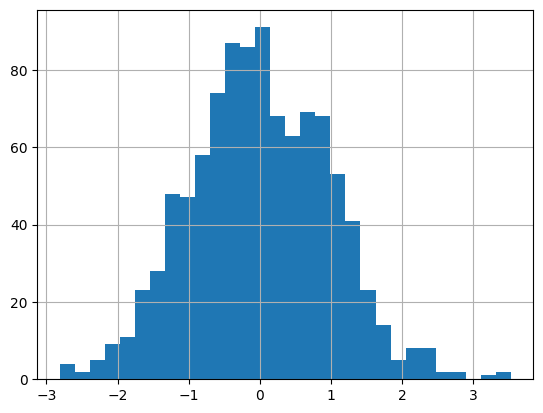

In [180]:
pd.Series(a).hist(bins=30)

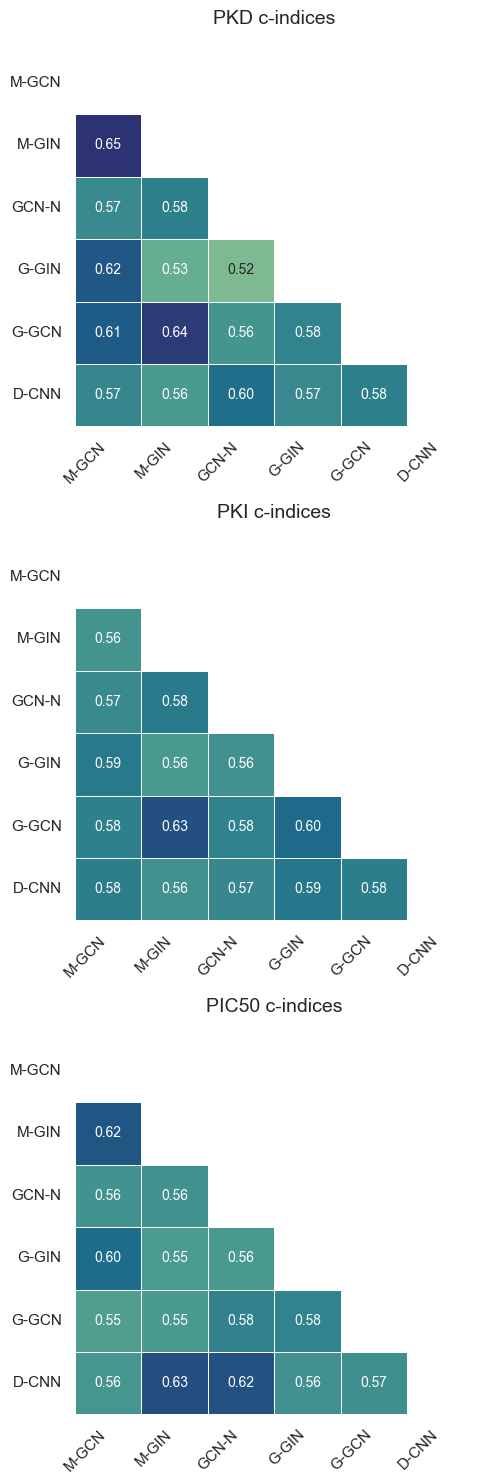

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(5, 15))  # Change to 3 rows and 1 column

labels = ['M-GCN', 'M-GIN', 'GCN-N', 'G-GIN', 'G-GCN', 'D-CNN']

for idx, x in enumerate(['pkd', 'pki', 'pic50']):
    concordances = pd.read_csv(f"{x}_concordances.csv")

    matrix = np.zeros((n_sequences, n_sequences))
    vals = [0, 5, 9, 12, 14]
    for i, start in enumerate(vals):
        end = vals[i + 1] if i + 1 < len(vals) else 15
        matrix[5 - i, :end - start] = concordances['C-Index'][start:end].values

    # Create mask for upper triangle
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    # Set up aesthetic parameters
    sns.set_theme(style="white")

    # Create heatmap with custom colors
    cmap = sns.color_palette("crest", as_cmap=True)
    heatmap = sns.heatmap(
        matrix,
        mask=mask,
        cmap=cmap,
        vmin=0.5,
        vmax=0.65,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 10},
        linewidths=0.5,
        cbar=False,  # Remove the color bar
        ax=axes[idx]
    )

    # Add titles and labels
    heatmap.set_title(f'{x.upper()} c-indices', fontsize=14, pad=20)

    # Adjust tick labels
    heatmap.set_xticks(np.arange(6) + 0.5)
    heatmap.set_yticks(np.arange(6) + 0.5)
    heatmap.set_xticklabels(labels, rotation=45, ha='right')
    heatmap.set_yticklabels(labels, rotation=0)

plt.tight_layout()
plt.show()


In [6]:
u_stat, p_value = mannwhitneyu(random_concordances, concordances, alternative='less')

print("Mann–Whitney U statistic:", u_stat)
print("One-sided p-value:", p_value)

ValueError: Array shapes are incompatible for broadcasting.